In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


In [39]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [41]:
df.shape

(768, 9)

In [42]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
for i in df.columns:
    df[i]=df[i].replace(0,df[i].mean())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.576145
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.310515
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.348958
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.348958
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.348958
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


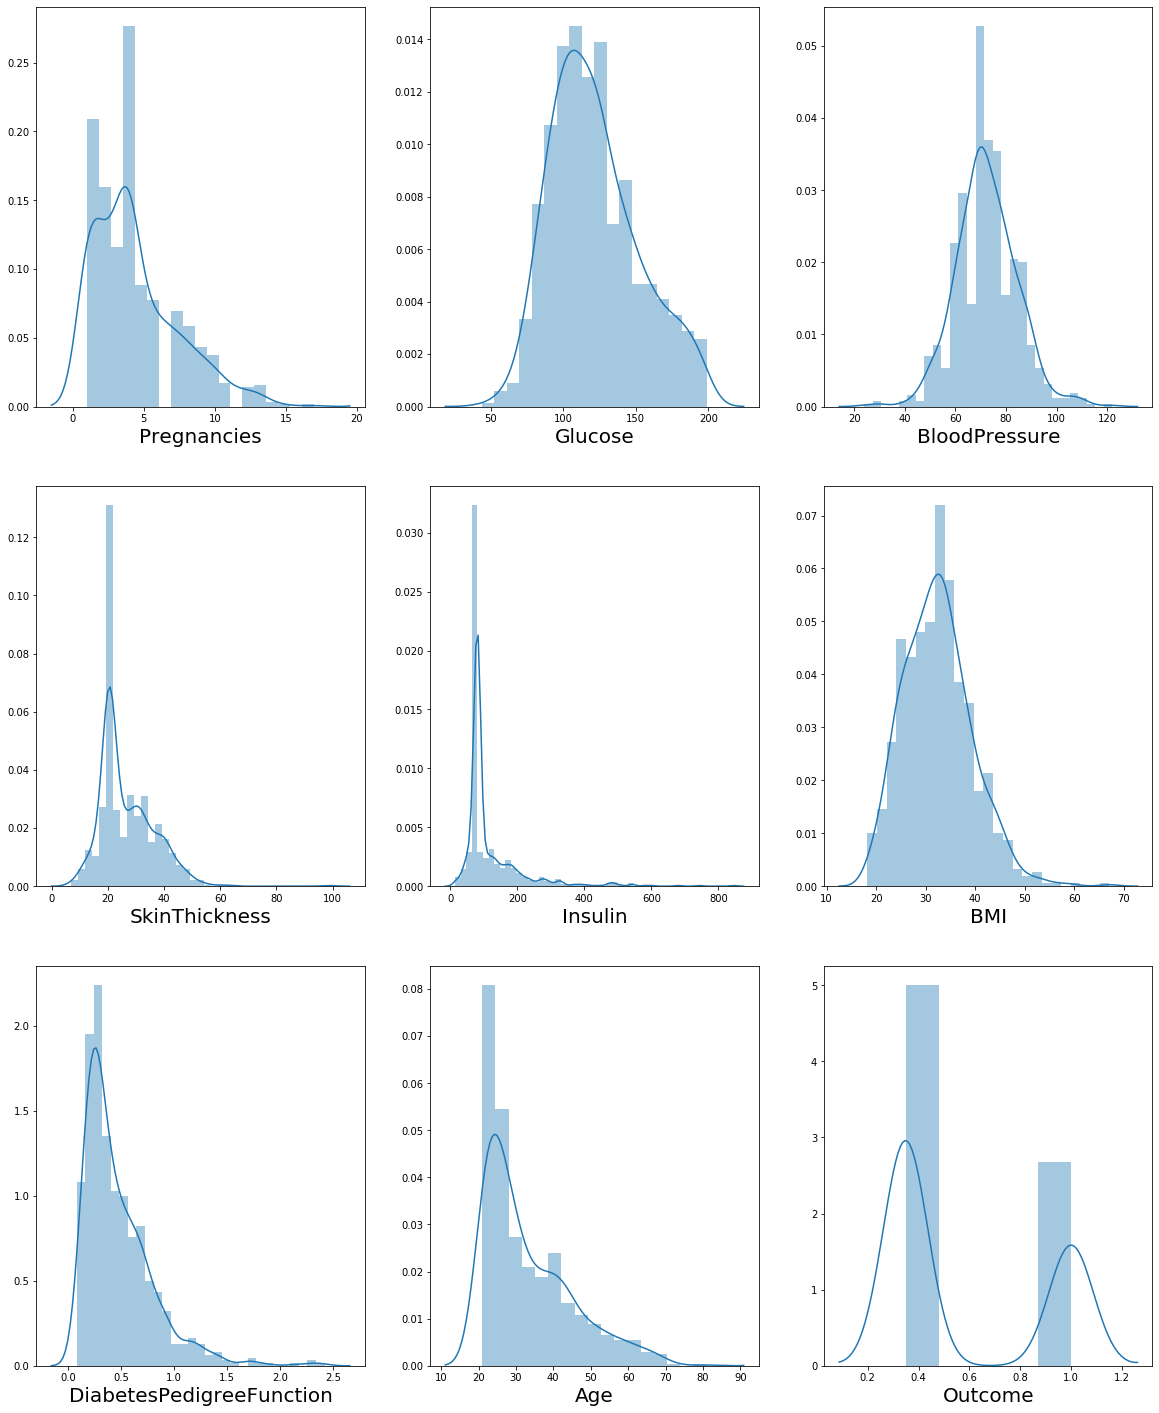

In [45]:
plt.figure(figsize=(20,25))
c=1
for i in df.columns:
    if c<=9:
        plt.subplot(3,3,c)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    c=c+1
plt.show()
    

In [46]:
list1=[]  #creating empty list
def outlier_detection(data,column): #nested minimum and maximum ranbge inside it
    IQR=data[i].quantile(0.75)-data[i].quantile(0.25)
    def upper_whisker(data,column):   #function for upper whicker of box plot
        maximum=data[i].quantile(0.75)+1.5*(IQR)
        return maximum
    list1.append(upper_whisker(data,column))
    def lower_whisker(data,column):    #fuction for lower whisker of boxplot
        minimum=data[i].quantile(0.25)-1.5*(IQR)
        return minimum
    list1.append(lower_whisker(data,column))
for i in df.columns:
    outlier_detection(df,i)
list1   #printing final list conatining upper and lower whisker
upper_limit=[list1[i] for i in range(len(list1)) if i%2==0]   #upper whisker values
lower_limit=[list1[j] for j in range(len(list1))if j%2!=0]  #lower whisker value
print("upper limit: ",upper_limit,"\n","lower_limit :",lower_limit)

upper limit:  [12.0, 201.0, 104.0, 49.1953125, 198.42578125, 50.25, 1.2, 66.5, 1.9765625] 
 lower_limit : [-4.0, 39.0, 40.0, 3.341145833333332, 8.623697916666671, 13.849999999999998, -0.32999999999999996, -1.5, -0.6276041666666667]


In [49]:
df=df.loc[(df["Pregnancies"] < upper_limit[0]) & (df["Pregnancies"] >lower_limit[0])]
df=df.loc[(df["Glucose"] < upper_limit[1]) & (df["Glucose"] > lower_limit[1])]
df=df.loc[(df['BloodPressure'] < upper_limit[2]) & (df['BloodPressure'] > lower_limit[2])]
df=df.loc[(df['SkinThickness'] < upper_limit[3]) & (df['SkinThickness'] > lower_limit[3])]
df=df.loc[(df['Insulin'] < upper_limit[4]) & (df['Insulin'] >  lower_limit[4])]
df=df.loc[(df['BMI'] < upper_limit[5]) & (df['BMI'] > lower_limit[5])]
df=df.loc[(df['DiabetesPedigreeFunction'] < upper_limit[6]) & (df['DiabetesPedigreeFunction'] > lower_limit[6])]
df=df.loc[(df['Age'] < upper_limit[7]) & (df['Age'] >lower_limit[7])]
df=df.loc[(df['Outcome'] < upper_limit[8]) & (df['Outcome'] > lower_limit[8])]


In [50]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.00000,603.000000,603.000000,603.000000
mean,4.132644,117.138429,71.365464,25.221289,91.899547,31.51697,0.416486,32.142620,0.549777
std,2.601561,28.047311,10.817369,8.227133,33.985316,6.23261,0.244511,10.848376,0.300938
min,1.000000,44.000000,44.000000,8.000000,15.000000,18.20000,0.078000,21.000000,0.348958
25%,2.000000,97.000000,64.000000,20.536458,79.799479,27.00000,0.236000,24.000000,0.348958
50%,3.845052,112.000000,70.000000,20.536458,79.799479,31.60000,0.340000,28.000000,0.348958
75%,6.000000,132.500000,78.000000,31.000000,94.000000,35.30000,0.564500,39.000000,1.000000
max,11.000000,197.000000,102.000000,49.000000,196.000000,50.00000,1.191000,66.000000,1.000000


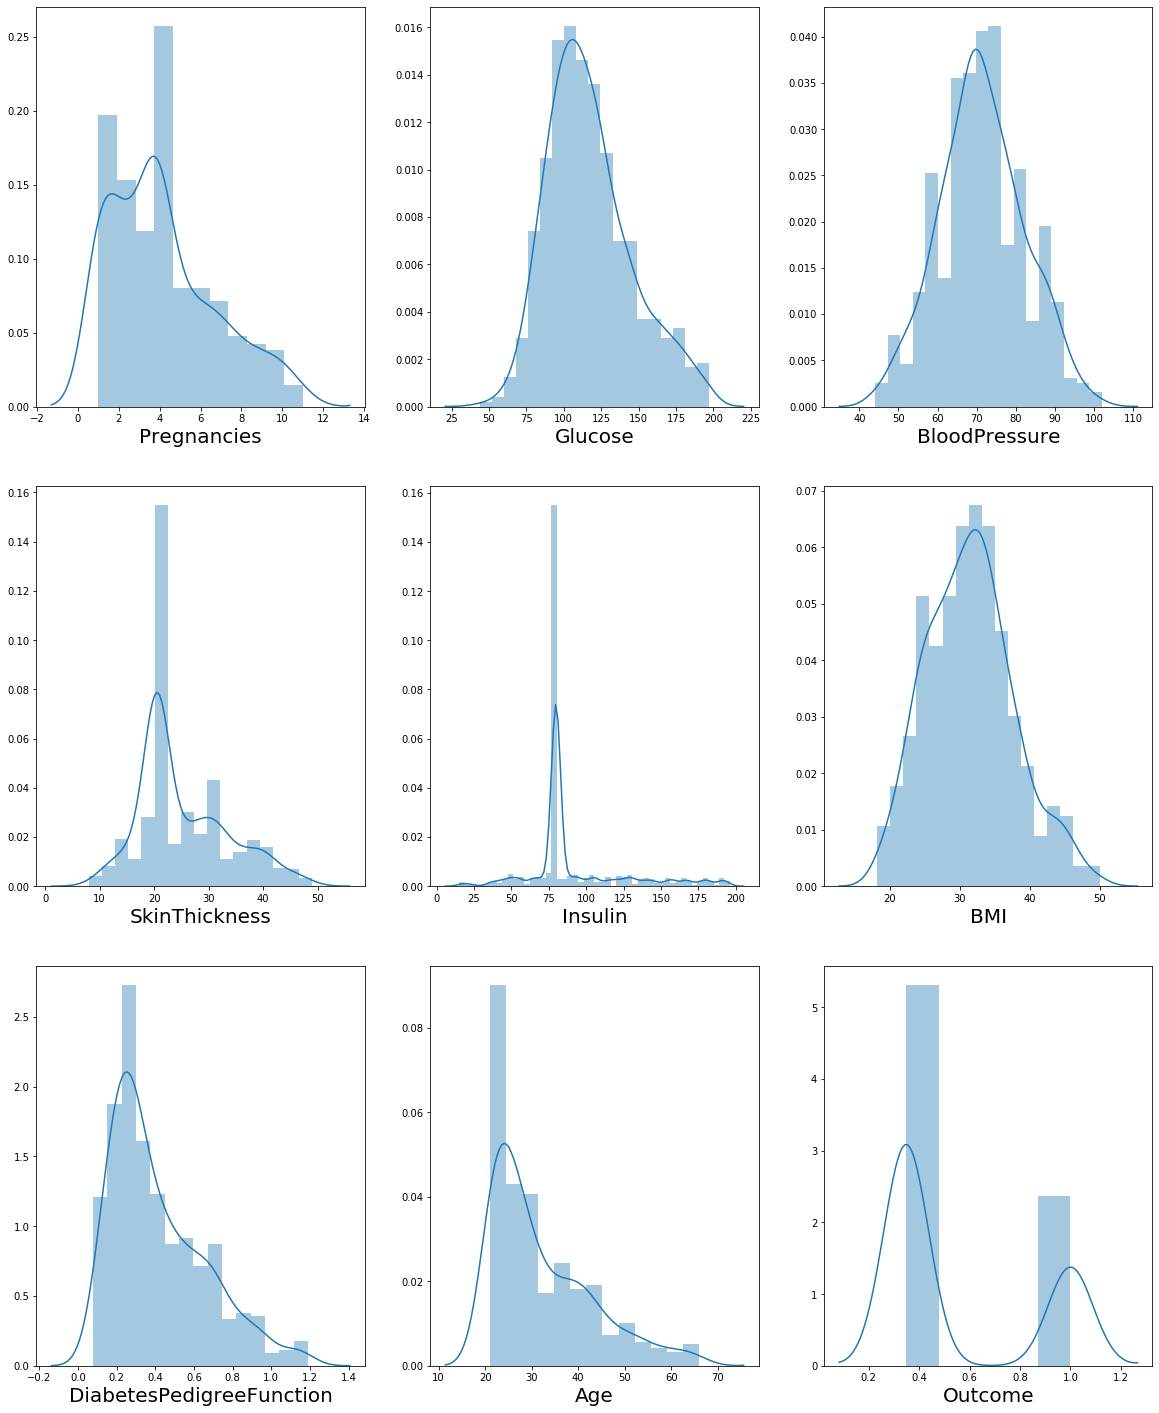

In [51]:
plt.figure(figsize=(20,25))
c=1
for i in df.columns:
    if c<=9:
        plt.subplot(3,3,c)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    c=c+1
plt.show()